<a href="https://colab.research.google.com/github/lis55/stockPrediction/blob/main/stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla Stocks price prediction


---

The following is an implementation of 2 different methods for Tesla stocks price prediction: 

1) LSTM

2) Running average

The first step is to import the necessary libraries and loading the data from the csv file into a dataframe. In the output cell, the head and bottom of dataframe is displayed. 

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('stock_prices.csv')
data

,Date,Open,High,Low,Close,Volume
0,2013-01-02,7.000000,7.090000,6.942000,7.072000,5974000
1,2013-01-03,7.036000,7.090000,6.950000,6.954000,3710000
2,2013-01-04,6.960000,6.960000,6.784000,6.880000,3370000
3,2013-01-07,6.960000,6.960000,6.780000,6.868000,2210000
4,2013-01-08,6.900000,6.900000,6.622000,6.736000,6420000
...,...,...,...,...,...,...
2133,2021-06-23,632.000000,657.200012,630.039978,656.570007,31099200
2134,2021-06-24,674.989990,697.619995,667.609985,679.820007,45982400
2135,2021-06-25,689.580017,693.809998,668.700012,671.869995,32496700
2136,2021-06-28,671.640015,694.700012,670.320007,688.719971,21628200


### We will focus on predicting the "close" variable. The input consists of 16 times steps t predict the closing price of at the next time step (day). The data is normalized. I used 5 LSTM layers of 50 units.

In [3]:
features_array = data[['Open','High','Low','Close','Volume']]
#Reescaling the data
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(features_array)

X_train = []
y_train = []
n_past = 16
n_future = 1
for i in range(n_past, 2138):
    X_train.append(training_set_scaled[i-n_past:i, 3])
    y_train.append(training_set_scaled[i, 3])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)



Epoch 1/500
67/67 [==============================] - 25s 9ms/step - loss: 0.0140
Epoch 2/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 3/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 4/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 5/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 6/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 7/500
67/67 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 8/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 9/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 10/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 11/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0014
Epoch 12/500
67/67 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 13/500
67/67 [================

Moving average
The next steps is to prepare the test set which includes the last 14 days to be predicted. As with the training set, the data is normalized. In order to visualize the data, the inverse scaling is applied and the prediction and labels are plotted as seen bellow


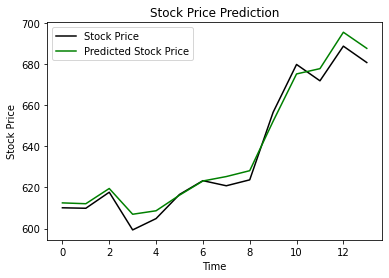

In [4]:
inputs = features_array['Close'].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(inputs)
inputs = sc.transform(inputs)
X_test = []
for i in range(n_past, 2139):
    X_test.append(inputs[i-n_past:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape(-1,1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(features_array['Close'].values[-14:], color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price[-14:], color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



---
The second approach is the running average.



2137


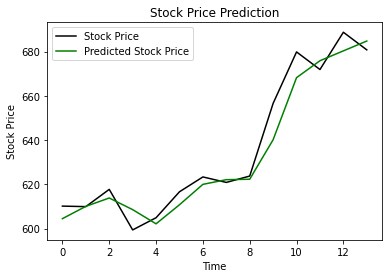

In [25]:

N = 2
cumsum, moving_aves = [0], []

for i, x in enumerate(features_array['Close'].values, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
moving_aves = np.array(moving_aves)
plt.plot(features_array['Close'].values[-14:], color = 'black', label = 'Stock Price')
print(len(moving_aves))
moving_aves = moving_aves.reshape(-1,)
plt.plot(moving_aves[-14:], color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html


https://www.kaggle.com/sohier/tutorial-accessing-data-with-pandas


https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html
